In [1]:
run config

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
import os
from tqdm import tqdm


In [3]:
def crop_center(img):    
    new_width=256
    new_height=256

    width, height = img.size   # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    img = img.crop((left, top, right, bottom))
    
    return np.array(img)

def add_noise(img):
    noise=np.float32(np.random.normal(0, 30/255, (3,256,256)))
    noisy_img=np.clip(img+noise,0,1)
    
    return noisy_img

In [4]:
k=0
l=0
m=0
for i in tqdm(os.listdir(original_path)):
    for j in range(11):
        
        if j<len(os.listdir(original_path+i)):
            
            img_path=os.listdir(original_path+i)[j]
            img=Image.open(original_path+i+'/'+img_path)
            img=crop_center(img)   ##crop center to 256x256
            if len(img.shape)==2:                 ##check there aren't imgs with 2 channels only
                img=img[:, :, None] * np.ones(3, dtype=int)[None, None, :]
            img=np.transpose(img, (2,0,1))            ##reshape to have number of channels first
            img=np.float32(img/np.max(img))       ##convert to float
            noisy_img= add_noise(img)

            if m<970:
                torch.save(torch.FloatTensor(img), data_path + 'clean_train/' + '{0:05}'.format(k))
                torch.save(torch.FloatTensor(noisy_img), data_path + 'noisy_train/' + '{0:05}'.format(k))
                k+=1
            else:
                torch.save(torch.FloatTensor(img), data_path + 'clean_val/' + '{0:05}'.format(l))
                torch.save(torch.FloatTensor(noisy_img), data_path + 'noisy_val/' + '{0:05}'.format(l)) 
                l+=1
        
    m+=1
        

100%|██████████| 1000/1000 [17:35<00:00,  1.06s/it]


In [5]:
len(os.listdir(data_path+'clean_train/'))

10655

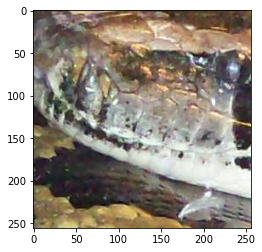

In [10]:
plt.imshow(torch.load(data_path+'clean_train/'+'10160').permute(1,2,0))

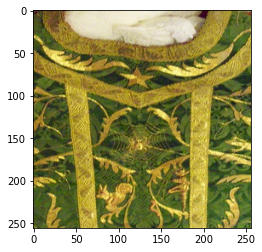

In [12]:
plt.imshow(torch.load(data_path+'clean_val/'+'00300').permute(1,2,0))